In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error

In [2]:
file_path = "car_price_prediction_.csv"
df = pd.read_csv(file_path)
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [4]:
for col in ['Brand','Fuel Type','Transmission','Condition','Model']:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,5,2016,2.3,3,1,114832,1,26613.92,19
1,2,1,2018,4.4,1,1,143190,2,14679.61,1
2,3,0,2013,4.5,1,1,181601,1,44402.61,3
3,4,5,2011,4.1,0,0,68682,1,86374.33,20
4,5,2,2009,2.6,0,1,223009,0,73577.10,21


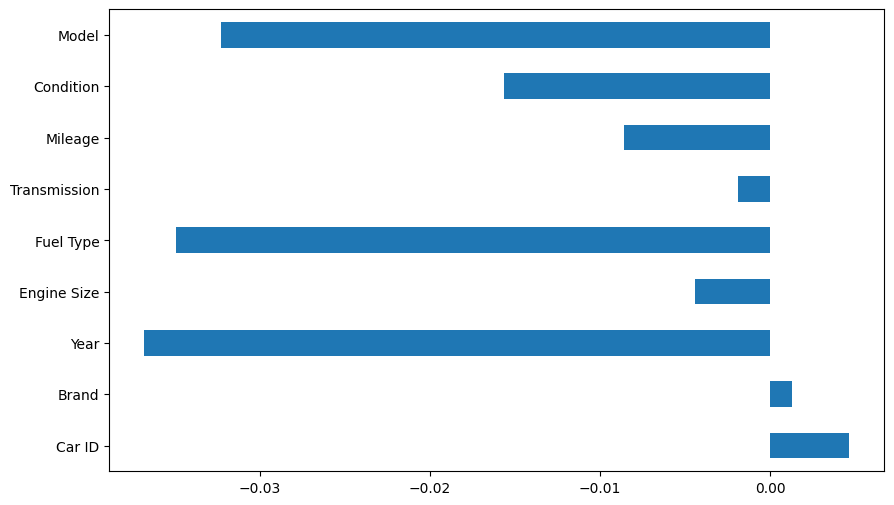

In [6]:
corr_vals = df.corr()['Price'].drop('Price')
corr_vals.plot(kind='barh',figsize=(10,6))
plt.show()

In [7]:
X = df.drop('Price',axis=1)
y = df['Price']
X = StandardScaler().fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [8]:
rt = DecisionTreeRegressor(criterion='squared_error',max_depth=8,random_state=42)

In [9]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [10]:
y_pred = rt.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(29687.955751673737)

In [12]:
rt.score(X_test,y_test)

-0.17175130999197208